# Домашнее задание 3
Скачать данные о домах<br>
Считать данные с помощью pandas<br>
Вывести на экран первые 5 строк<br>
1.2 Создать новый признак delta_renovated, который будет содержать разницу в годах между годом реновацией дома и годом постройки дома<br>
Если реновации дома не было, то в новом признаке поставьте 0<br>
1.3 Создайте признаки года продажи, месяца продажи<br>
1.4 Удалите признаки date, zipcode, lat, long

In [2]:
import pandas as pd

## Считываем данные

In [3]:
df = pd.read_csv(r'C:\temp\kc_house_data.csv', encoding='ISO-8859-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.2 Создать новый признак delta_renovated, который будет содержать разницу в годах между годом реновацией дома и годом постройки дома<br>Если реновации дома не было, то в новом признаке поставьте 0

In [59]:
df['delta_renovated'] = df['yr_renovated'] - df['yr_built']
df[df['delta_renovated']<0] = 0

In [60]:
df['delta_renovated'].head()

0     0
1    40
2     0
3     0
4     0
Name: delta_renovated, dtype: int64

## 1.3 Создайте признаки года продажи, месяца продажи<br>

In [63]:
from datetime import date

In [72]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df[['date', 'year', 'month']]


,date,year,month
0,1970-01-01,1970,1
1,2014-12-09,2014,12
2,1970-01-01,1970,1
3,1970-01-01,1970,1
4,1970-01-01,1970,1
...,...,...,...
21608,1970-01-01,1970,1
21609,1970-01-01,1970,1
21610,1970-01-01,1970,1
21611,1970-01-01,1970,1


## 1.4 Удалите признаки date, zipcode, lat, long

In [73]:
df = df.drop(['date', 'zipcode', 'lat', 'long'], axis=1)

In [74]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'delta_renovated', 'year', 'month'],
      dtype='object')

In [80]:
assert( 'date' not in df.columns)
assert( 'zipcode' not in df.columns)
assert( 'lat' not in df.columns)
assert( 'long' not in df.columns)

# Задача 2

## Создайте датафрейм с клиентами

In [81]:
clients = pd.DataFrame(
    {
    'client_id': [1459, 4684, 3498, 3942, 4535, 2308, 2866, 2765, 1472, 4236, 2295, 939, 3840, 280, 20, 4332, 3475, 4213, 3113, 4809, 2134, 2242, 2068, 4929, 1384, 1589, 3317, 2260, 1727, 1764, 1611, 1474],
    'house_id': [8965450190, 6823100225, 5104540330, 2131701075, 1522700060,
    1189000207, 6821600300, 7137950720, 9510920050, 6131600255,
    5428000070, 1788800910, 8100400160, 3123049142, 6306800010,
    5083000375, 7920100025, 1951600150, 809001400, 339600110,
    1622049154, 1099600250, 8563000110, 2768100205, 3995700435,
    8861700030, 3303980210, 7731100066, 8146100580, 825069097,
    3889100029, 9524100196]
    }
)

In [82]:
clients.head()

,client_id,house_id
0,1459,8965450190
1,4684,6823100225
2,3498,5104540330
3,3942,2131701075
4,4535,1522700060


## 2.1 Присоедините к таблице clients данные по домам через метод join

In [95]:
clients_id = clients.set_index('house_id')
houses_id = df.set_index('id')
joined_df = houses_id.join(clients_id).reset_index()
joined_df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month,house_id,client_id
0,0,0.0,0,0.0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,1970,1,0,NaN
1,0,0.0,0,0.0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,1970,1,0,NaN
2,0,0.0,0,0.0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,1970,1,0,NaN
3,0,0.0,0,0.0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,1970,1,0,NaN
4,0,0.0,0,0.0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,1970,1,0,NaN


In [97]:
joined_df[joined_df['client_id'].isna()==False]

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month,house_id,client_id
20889,1622049154,289900.0,3,1.75,1899,11325,2.0,0,0,3,...,0,1943,2005,2000,10454,62,2014,12,1622049154,2134.0
20963,2131701075,420000.0,3,1.75,1720,5000,1.5,0,0,3,...,0,1932,2009,1410,8300,77,2014,12,2131701075,3942.0


## 2.2 Присоедините к таблице clients данные по домам через метод merge

In [92]:
merged = clients.merge(df, left_on='house_id', right_on='id')
merged

,client_id,house_id_x,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,year,month,house_id_y
0,3942,2131701075,2131701075,420000.0,3,1.75,1720,5000,1.5,0,...,1720.0,0,1932,2009,1410,8300,77,2014,12,2131701075
1,2134,1622049154,1622049154,289900.0,3,1.75,1899,11325,2.0,0,...,1899.0,0,1943,2005,2000,10454,62,2014,12,1622049154


# Задача 3<br>Составьте несколько сводных таблиц

## 3.1 Найдите среднюю стоимость домов в зависимости от количества спален<br>Отсортируйте от меньшей стоимости к большей


In [4]:
grouped_df = df.groupby('bathrooms')

In [13]:
grouped_df.mean().sort_values(by=['price'], ascending=True).head(10)

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bathrooms,,,,,,,,,,,,,,,,,,,
0.50,5.519975e+09,237375.000000,2.250000,1235.000000,5465.500000,1.250000,0.000000,0.000000,3.250000,6.250000,992.500000,242.500000,1948.000000,0.000000,98122.750000,47.546050,-122.279500,1545.000000,5844.750000
0.75,4.057760e+09,294520.861111,1.875000,896.611111,19462.083333,1.076389,0.083333,0.402778,3.472222,5.611111,829.388889,67.222222,1944.291667,110.375000,98091.111111,47.539242,-122.219014,1470.444444,19941.666667
1.00,4.456093e+09,347041.235202,2.635514,1181.123313,11423.722482,1.111760,0.002856,0.093977,3.455088,6.564123,1094.409764,86.582295,1944.423676,65.513499,98101.655504,47.563013,-122.273160,1451.188733,9859.194964
1.50,4.538203e+09,409322.206777,3.038036,1544.630014,11058.798755,1.349931,0.002075,0.122407,3.476487,7.134855,1347.730982,196.899032,1960.047026,52.397649,98090.899032,47.560455,-122.257748,1619.198479,9728.132780
0.00,4.725288e+09,448160.000000,0.300000,1636.800000,16286.600000,1.750000,0.000000,0.400000,2.900000,6.300000,1636.800000,0.000000,1971.200000,0.000000,98052.900000,47.519810,-122.049100,1899.000000,17288.100000
7.50,4.240490e+08,450000.000000,9.000000,4050.000000,6504.000000,2.000000,0.000000,0.000000,3.000000,7.000000,4050.000000,0.000000,1996.000000,0.000000,98144.000000,47.592300,-122.301000,1448.000000,3866.000000
1.75,4.560155e+09,454896.096785,3.247047,1787.202428,15125.969816,1.143373,0.006234,0.213583,3.603675,7.259186,1406.654528,380.547900,1960.638451,87.609908,98080.311352,47.562919,-122.231092,1796.561680,13245.729331
2.00,4.586917e+09,457889.718653,3.308808,1796.669430,14227.944560,1.290674,0.002591,0.161140,3.578756,7.240933,1491.026425,305.643005,1961.254922,145.694301,98083.698964,47.556553,-122.233415,1736.832642,12044.885492
2.25,4.533461e+09,533676.773815,3.425989,2097.700537,14037.079629,1.604787,0.005862,0.188569,3.440645,7.805081,1755.058134,342.642404,1977.785051,47.801172,98066.507084,47.564339,-122.205412,2024.670249,12835.447973


## 3.2 Найдите минимальную, среднюю и максимальную стоимости домов в зависимости от состояния дома

In [15]:
grouped_df = df.groupby('condition')
grouped_df.agg({'price':['min', 'mean', 'max']})

price                          
                min           mean        max
condition                                    
1           78000.0  334431.666667  1500000.0
2           80000.0  327287.145349  2555000.0
3           75000.0  542012.578148  7062500.0
4           89000.0  521200.390033  7700000.0
5          110000.0  612418.089359  3650000.0

# 3.3 Постройте таблицу с подсчетом количества домов в данных <br>в зависимости от вида на набережную и оценкой вида

In [16]:
grouped_df = df.groupby(['waterfront','view'])

In [20]:
grouped_df['id'].count()

waterfront  view
0           0       19489
            1         331
            2         955
            3         491
            4         184
1           1           1
            2           8
            3          19
            4         135
Name: id, dtype: int64

# 3.4 Каких домов в зависимости от этажности и количества спален больше?

In [83]:
grouped_df = df.groupby(['bedrooms','floors'])
result_ser = grouped_df['id'].count()
result_ser.name = 'sum'
result_df = result_ser.to_frame()

In [84]:
result_df = result_df.reset_index()
result_df['floors and bedrooms'] = result_df['floors'].astype(str) + 'f_' + result_df['bedrooms'].astype(str) + 'b'

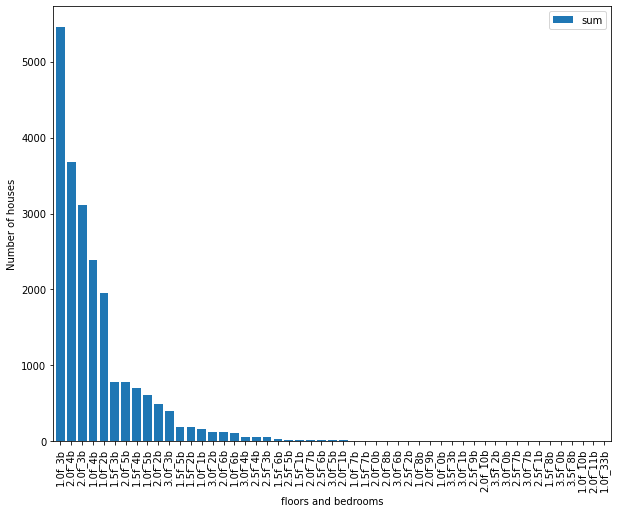

In [85]:
sorted_df = result_df.sort_values(by=['sum'], ascending=False).sort_values(by=['sum'], ascending=False)
# sorted_df['sum'].plot.bar(x='floors and bedrooms', width=0.8, figsize=(10, 8,));
sorted_df.plot.bar(x='floors and bedrooms', y='sum', width=0.8, figsize=(10, 8,));
plt.xlabel('floors and bedrooms')
plt.ylabel('Number of houses')
plt.show()

## Больше всего домов с одним этажом и тремя спальнями

# 3.5 Постройте таблицу с подсчетом медианной стоимости домов в данных в зависимости от состояния дома и оценки дома

In [91]:
df.pivot_table(
    index='grade',
    values='price',
    aggfunc='median'
).reset_index()

,grade,price
0,1,142000.0
1,3,262000.0
2,4,205000.0
3,5,228700.0
4,6,275276.5
5,7,375000.0
6,8,510000.0
7,9,720000.0
8,10,914327.0
9,11,1284000.0
